Importing libraries and loading data

In [1]:
# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn tools
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif, VarianceThreshold

from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE, KMeansSMOTE, SMOTENC
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif,chi2
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

df = pd.read_csv("purchase600-100cls-15k.lrn.csv").drop('ID', axis=1)#.sample(frac=1).reset_index()
#df_test = pd.read_csv("purchase600-100cls-15k.tes.csv").drop('ID', axis=1)#.sample(frac=1).reset_index()

Train/test splitting

In [2]:
X = df.drop('class', axis=1) # non target
y = df['class'] # target

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20)

Feature selection (chi2 / mutual information)

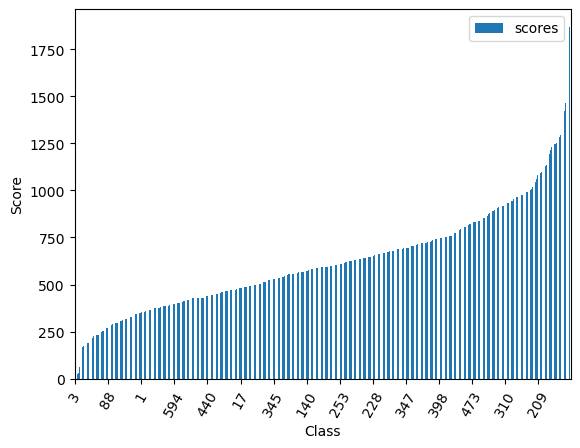

In [3]:
def select_features(X_train, X_test, y_train):
	#fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs = SelectKBest(score_func=chi2, k=300)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

#X_train, X_test, new = select_features(X_train, X_test, y_train, 350)
#X_train, X_test = pd.DataFrame(X_train), pd.DataFrame(X_test)

X_train_sel, X_test_sel, sel = select_features(X_train, X_test, y_train)

X_train_sel, X_test_sel = pd.DataFrame(X_train_sel), pd.DataFrame(X_test_sel)
scr = pd.DataFrame({'id':X_train.columns,'scores':sel.scores_})

scr_sorted =scr.sort_values(by='scores')

ax = scr_sorted.plot.bar(rot=60)

plt.xlabel('Class')
plt.ylabel('Score')
plt.locator_params(axis='x', nbins=15)

plt.show()

Feature selection (variance)

In [4]:
def select_with_variance(X_train, X_test, y_train):
	fs = VarianceThreshold(threshold=(.8 * (1 - .8)))
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train_var, X_test_var, var = select_with_variance(X_train, X_test, y_train)

X_train_var, X_test_var = pd.DataFrame(X_train_var), pd.DataFrame(X_test_var)

Oversampling

<Figure size 640x480 with 0 Axes>

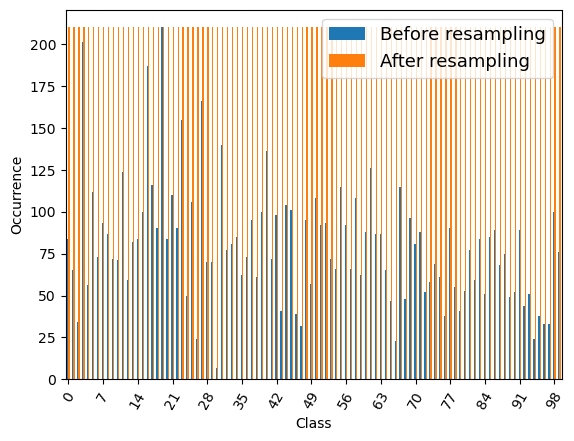

In [14]:
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE, KMeansSMOTE, SMOTENC

Os = RandomOverSampler()
X_train_os, y_train_os = Os.fit_resample(X_train, y_train)

a = pd.DataFrame({'Before resampling' : y_train.value_counts()})
b = pd.DataFrame({'After resampling' : y_train_os.value_counts()})
new = pd.concat([a,b], axis=1)
ax = new.plot.bar(rot=60)

fig = plt.gcf()
#fig.set_size_inches(19.5, 10.5)


plt.legend(prop={'size': 13})
plt.locator_params(axis='x', nbins=15)
plt.xlabel('Class')
plt.ylabel('Occurrence')

plt.show()
plt.draw()
fig.savefig('resampling.pdf', dpi=600)


Logistic regression (no impact of preprocessing)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

LR = OneVsOneClassifier(LogisticRegression(verbose = True))
#LR = LogisticRegression()

# Fit for feature selection with selekt_k_best
#LR.fit(X_train_sel, y_train)

# Fit for feature selection with removing variance
LR.fit(X_train_var, y_train)

# Fit for oversampling
#LR.fit(X_train_os, y_train)

y_pred = LR.predict(X_test_var)

#Evaluation
print(classification_report(y_test, y_pred, zero_division = 0))
print("score: ", LR.score(X_test_var, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

              precision    recall  f1-score   support

           0       0.53      0.36      0.43        22
           1       0.94      0.79      0.86        19
           2       1.00      0.67      0.80         9
           3       0.59      0.81      0.68        48
           4       0.88      1.00      0.94        15
           5       0.59      0.76      0.67        21
           6       1.00      0.65      0.79        20
           7       0.65      0.62      0.63        21
           8       0.63      0.94      0.76        18
           9       0.75      0.53      0.62        17
          10       0.60      0.41      0.49        22
          11       0.73      0.79      0.76        28
          12       0.69      0.58      0.63        19
          13       0.79      0.75      0.77        20
          14       0.60      0.48      0.53        25
          15       0.69      0.83      0.75        24
          16       0.53      0.73      0.62        45
          17       0.62    

The reported averages include macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label), and sample average (only for multilabel classification). Micro average (averaging the total true positives, false negatives and false positives) is only shown for multi-label or multi-class with a subset of classes, because it corresponds to accuracy otherwise and would be the same for all metrics.

Computing training time and evaluation metrics

In [10]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

f = pd.DataFrame(columns=['index', 'score'])
#evaluation = pd.DataFrame(columns=['index', 'precision', 'recall', 'fscore', 'accuracy'])
timer=pd.DataFrame(columns=['0','1','2','3','4','5'])

precision = pd.DataFrame(columns=['0','1','2','3','4','5'])
recall = pd.DataFrame(columns=['0','1','2','3','4','5'])
fscore = pd.DataFrame(columns=['0','1','2','3','4','5'])
accuracy = pd.DataFrame(columns=['0','1','2','3','4','5'])

for j in range(5):
    print('iteration: ',j)
    #n=0
    timing=[]
    acc = []
    pre = []
    rec = []
    fsc = []
    for i in np.arange(49,600,50):
        start_time = time.time()

        X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20)

        cols = X_train.columns

        mic = pd.DataFrame({'id': cols, 'mutual' : mutual_info_classif(X_train, y_train, discrete_features=True)})

        top = i

        selected = mic.sort_values(by='mutual').reset_index(drop=True).tail(top)

        X_train = X_train[selected['id']]
        X_test = X_test[selected['id']]

        classifier = LogisticRegression()

        classifier.fit(X_train, y_train)
        timing.append(time.time() - start_time)

        y_pred = classifier.predict(X_test)
        #scores = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=0)
        acc.append(accuracy_score(y_test, y_pred))
        pre.append(precision_score(y_test, y_pred, average='weighted'))
        rec.append(recall_score(y_test, y_pred, average='weighted'))
        fsc.append(f1_score(y_test, y_pred, average='weighted'))        
        #data = pd.DataFrame([[top, scores[0], scores[1], scores[2], acc]], columns=['index','precision', 'recall', 'fscore', 'accuracy'])
        #print(data)
        #evaluation = evaluation.append(data)
    print(timing)    
    timer[f'{j}']=timing
    accuracy[f'{j}']= acc
    precision[f'{j}']= pre
    recall[f'{j}']= rec
    fscore[f'{j}']= fsc

iteration:  0


/home/cristiano/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/cristiano/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cristiano/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge 

[3.2147738933563232, 3.175340175628662, 3.5546348094940186, 4.581474304199219, 4.12488579750061, 5.795851230621338, 5.073052406311035, 5.250868797302246, 6.462969064712524, 5.599816083908081, 5.695462703704834, 5.920867681503296]
iteration:  1


/home/cristiano/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/cristiano/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cristiano/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge 

[4.017762184143066, 3.1890711784362793, 4.50645112991333, 5.808128356933594, 4.75920844078064, 5.883873462677002, 6.971596002578735, 6.186079740524292, 7.480552673339844, 5.392176389694214, 5.654402494430542, 5.844454765319824]
iteration:  2


/home/cristiano/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/cristiano/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cristiano/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge 

[3.0199520587921143, 3.15696120262146, 3.2877535820007324, 3.633716583251953, 3.9124324321746826, 4.314777374267578, 4.377826929092407, 4.85350227355957, 5.077367544174194, 5.239309549331665, 5.518855810165405, 6.147533893585205]
iteration:  3


/home/cristiano/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/cristiano/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cristiano/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge 

[2.927215576171875, 12.965548992156982, 12.445974588394165, 13.18440866470337, 14.419931888580322, 14.360404014587402, 15.22797703742981, 16.48450517654419, 17.46368980407715, 18.221304655075073, 19.60004734992981, 20.044787406921387]
iteration:  4


/home/cristiano/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/cristiano/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[11.036846399307251, 11.346107959747314, 12.11662769317627, 13.13377046585083, 14.427395820617676, 14.19456958770752, 15.225085020065308, 16.395061016082764, 17.233323335647583, 17.458204746246338, 18.785712718963623, 19.21380043029785]


/home/cristiano/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/cristiano/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Plotting average training time

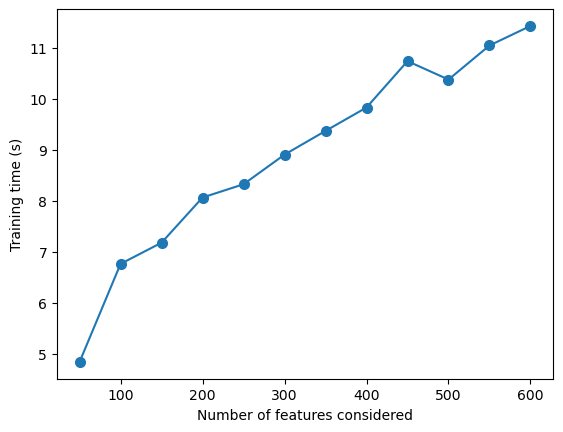

In [11]:
import matplotlib.pyplot as plt

timer['mean'] = timer.mean(axis=1)
accuracy['mean'] = accuracy.mean(axis=1)
precision['mean'] = precision.mean(axis=1)
recall['mean'] = recall.mean(axis=1)
fscore['mean'] = fscore.mean(axis=1)

fig = plt.gcf()
id = np.arange(50,601,50)
plt.plot(id, timer['mean'], marker='o', markersize=7)
plt.xlabel('Number of features considered')
plt.ylabel('Training time (s)')

plt.show()
plt.draw()

fig.savefig('time.pdf', dpi=600)

Plotting average evaluation metrics

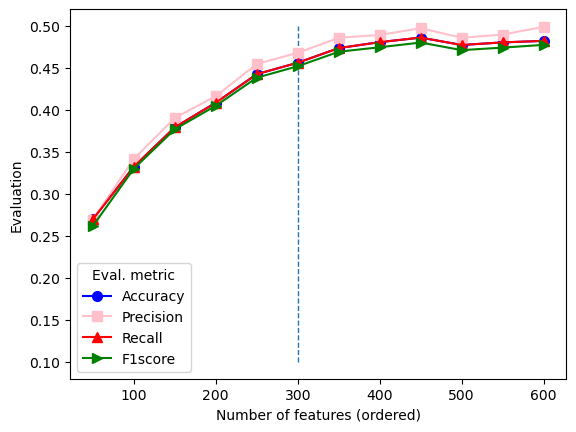

In [13]:
import matplotlib.pyplot as plt

fig = plt.gcf()

plt.plot(id, accuracy['mean'], marker='o', markersize=7, color='Blue', label='Accuracy')
plt.plot(id, precision['mean'], marker='s', markersize=7,  color='Pink', label='Precision')
plt.plot(id, recall['mean'], marker='^', markersize=7, color='Red', label='Recall')
plt.plot(id, fscore['mean'], marker='>', markersize=7, color='Green', label='F1score')
plt.vlines(300, 0.1, 0.5, linewidth=1, linestyles='dashed')
plt.xlabel('Number of features (ordered)')
plt.ylabel('Evaluation')

plt.legend(title='Eval. metric')
plt.show()
plt.draw()

fig.savefig('eval_selection.pdf', dpi=600)